# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM GM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
import pandas as pd # for data analysis and associated manipulation of tabular data in DataFrames.
import numpy as np #for performing mathematical operations on arrays.
import statistics # for analysation and visualisation of data to find unseen patterns.
from numpy import set_printoptions
import datetime#for extracting new features that can be added to the other features of the dataset.
from dateutil.parser import parse
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt # creating static and interactive visualisations.
import seaborn as sns#for making statistical graphics.
import plotly.express as px
from matplotlib import rc
%config InlineBackend.figure_format = 'retina' # for plotting figures and avoiding blurry images
sns.set_context('notebook') # Larger scale for plots in notebooks
## from skimpy import skim

# Plotting Pretty figures and avoiding blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots in notebooks
sns.set_context('notebook')

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
## from wordcloud import WordCloud

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')
pd.set_option('display.max_columns', 500)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Exploratory Data Analysis (EDA) helps us to understand our data without making any assumptions. It provides context and guidance on the course of action to take when developing the appropriate model. It will also assist in interpreting the results correctly. Without doing EDA it is difficult to understand the data fully.

## BASIC ANALYSIS

Using these four commands, we will perform a basic analysis:

- df.head()
- df.shape
- df.info()
- df.describe()

In [3]:
#checking the first 5 rows of the data
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0             sp25              0.0   
1            3.333333                0.0             sp25              0.0   
2            2.666667                0.0             sp25              0.0   
3            4.000000                0.0             sp25              0.0   
4            3.000000                0.0             sp25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4                NaN        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0   

In [4]:
# checking the features(columns) of data
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

Our features are:

- time
- Madrid_wind_speed
- Valencia_wind_deg
- 'Bilbao_rain_1h
- Valencia_wind_speed
- Seville_humidity
- Madrid_humidity
- Bilbao_clouds_all
- Bilbao_wind_speed
- Seville_clouds_all
- Bilbao_wind_deg 
- Barcelona_wind_speed
- Barcelona_wind_deg
- Madrid_clouds_all
- Seville_wind_speed
- Barcelona_rain_1h
- Seville_pressure
- Seville_rain_1h
- Bilbao_snow_3h
- Barcelona_pressure
- Seville_rain_3h
- Madrid_rain_1h
- Barcelona_rain_3h 
- Valencia_snow_3h 
- Madrid_weather_id
- Barcelona_weather_id 
- Bilbao_pressure
- Seville_weather_id
- Valencia_pressure 
- Seville_temp_max 
- Madrid_pressure
- Valencia_temp_max 
- Valencia_temp
- Bilbao_weather_id
- Seville_temp
- Valencia_humidity 
- Valencia_temp_min
- Barcelona_temp_max
- Madrid_temp_max 
- Barcelona_temp
- Bilbao_temp_min 
- Bilbao_temp
- Barcelona_temp_min
- Bilbao_temp_max 
- Seville_temp_min 
- Madrid_temp
- Madrid_temp_min
- load_shortfall_3

In [5]:
#checking the total number of rows and columns
df.shape

(8763, 49)

The data set has 8763 observations and 48 features

In [6]:
#checking to see if null value exist in each column and the data type of each observation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

The info command confirms our categorical and numerical features. If a feature (variable) is categorical the Dtype is object and if it is a numerical variable the Dtype is an int64 or float64. This command also shows us that 'Valencia_pressure'column contain any null values.

Now let's check how many values are missing!

In [7]:
#checking for missing/null values
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

It can be seen from the above that only Valencia_pressure has missing values and the total number of the missing values is 2068 which is quite large. We will have to fill the null values later on in the notebook.


### Univariate Analysis: Non-Graphical

In [8]:
# look at data statistics
df.describe().T

count          mean           std          min  \
Unnamed: 0            8763.0   4381.000000   2529.804538     0.000000   
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Unnamed: 0            2190.500000   4381.000000   6571.500000  8.762000e+03  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.0000

The describe() returns description of the data in the DataFrame and it shows only DataFrame containing numerical data,
the description contains the five number statistics information for each column:

- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile*.
- 50% - The 50% percentile*.
- 75% - The 75% percentile*.
- max - the maximum value.

From the above summary statistics, the following is observed;
- The standard deviation of the data is far apart and will required to be standardized.
- The difference between the Maximum and Mininum value is too wide apart across the features and will need to be rescaled. 
- Also there are some exaggerated figures (which could be potential outliers) this would be explored in great details.


# Skewness/Kurtosis and Outliers

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. 
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>
     For a more detailed explanation on skew and kurtosis read <a href="https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa">here</a>.
</div>


In [9]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

From the above, it observed that the following features have high positive skew;
- Bilbao_snow_3h
- Barcelona_pressure
- Seville_rain_3h 
- Barcelona_rain_3h 
- Valencia_snow_3h 

High negative skew;
- Madrid_weather_id
- Barcelona_weather_id 
- Seville_weather_id 

While the rest of the data feature are fairly symmetrical.

In [10]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers.
The following columns is suspected to contain a great number of outliers;
- Bilbao_rain_1h
- Valencia_wind_speed
- Barcelona_rain_1h
- Seville_rain_1h
- Bilbao_snow_3h
- Barcelona_pressure,
- Seville_rain_3h
- Madrid_rain_1h
- Barcelona_rain_3h
- Valencia_snow_3h

# Data Visualization

### Univariate Analysis: Non-Graphical 

We will be looking at the **distribution** of the data features by using the following plots:

- Histogram
- Density plot
- Box plot
- Violin plot
- Bar plot(for categorical features)

For displaying a histogram and density plot we will creating a list of all numerical features to visualise these features at the same time using matplotlib

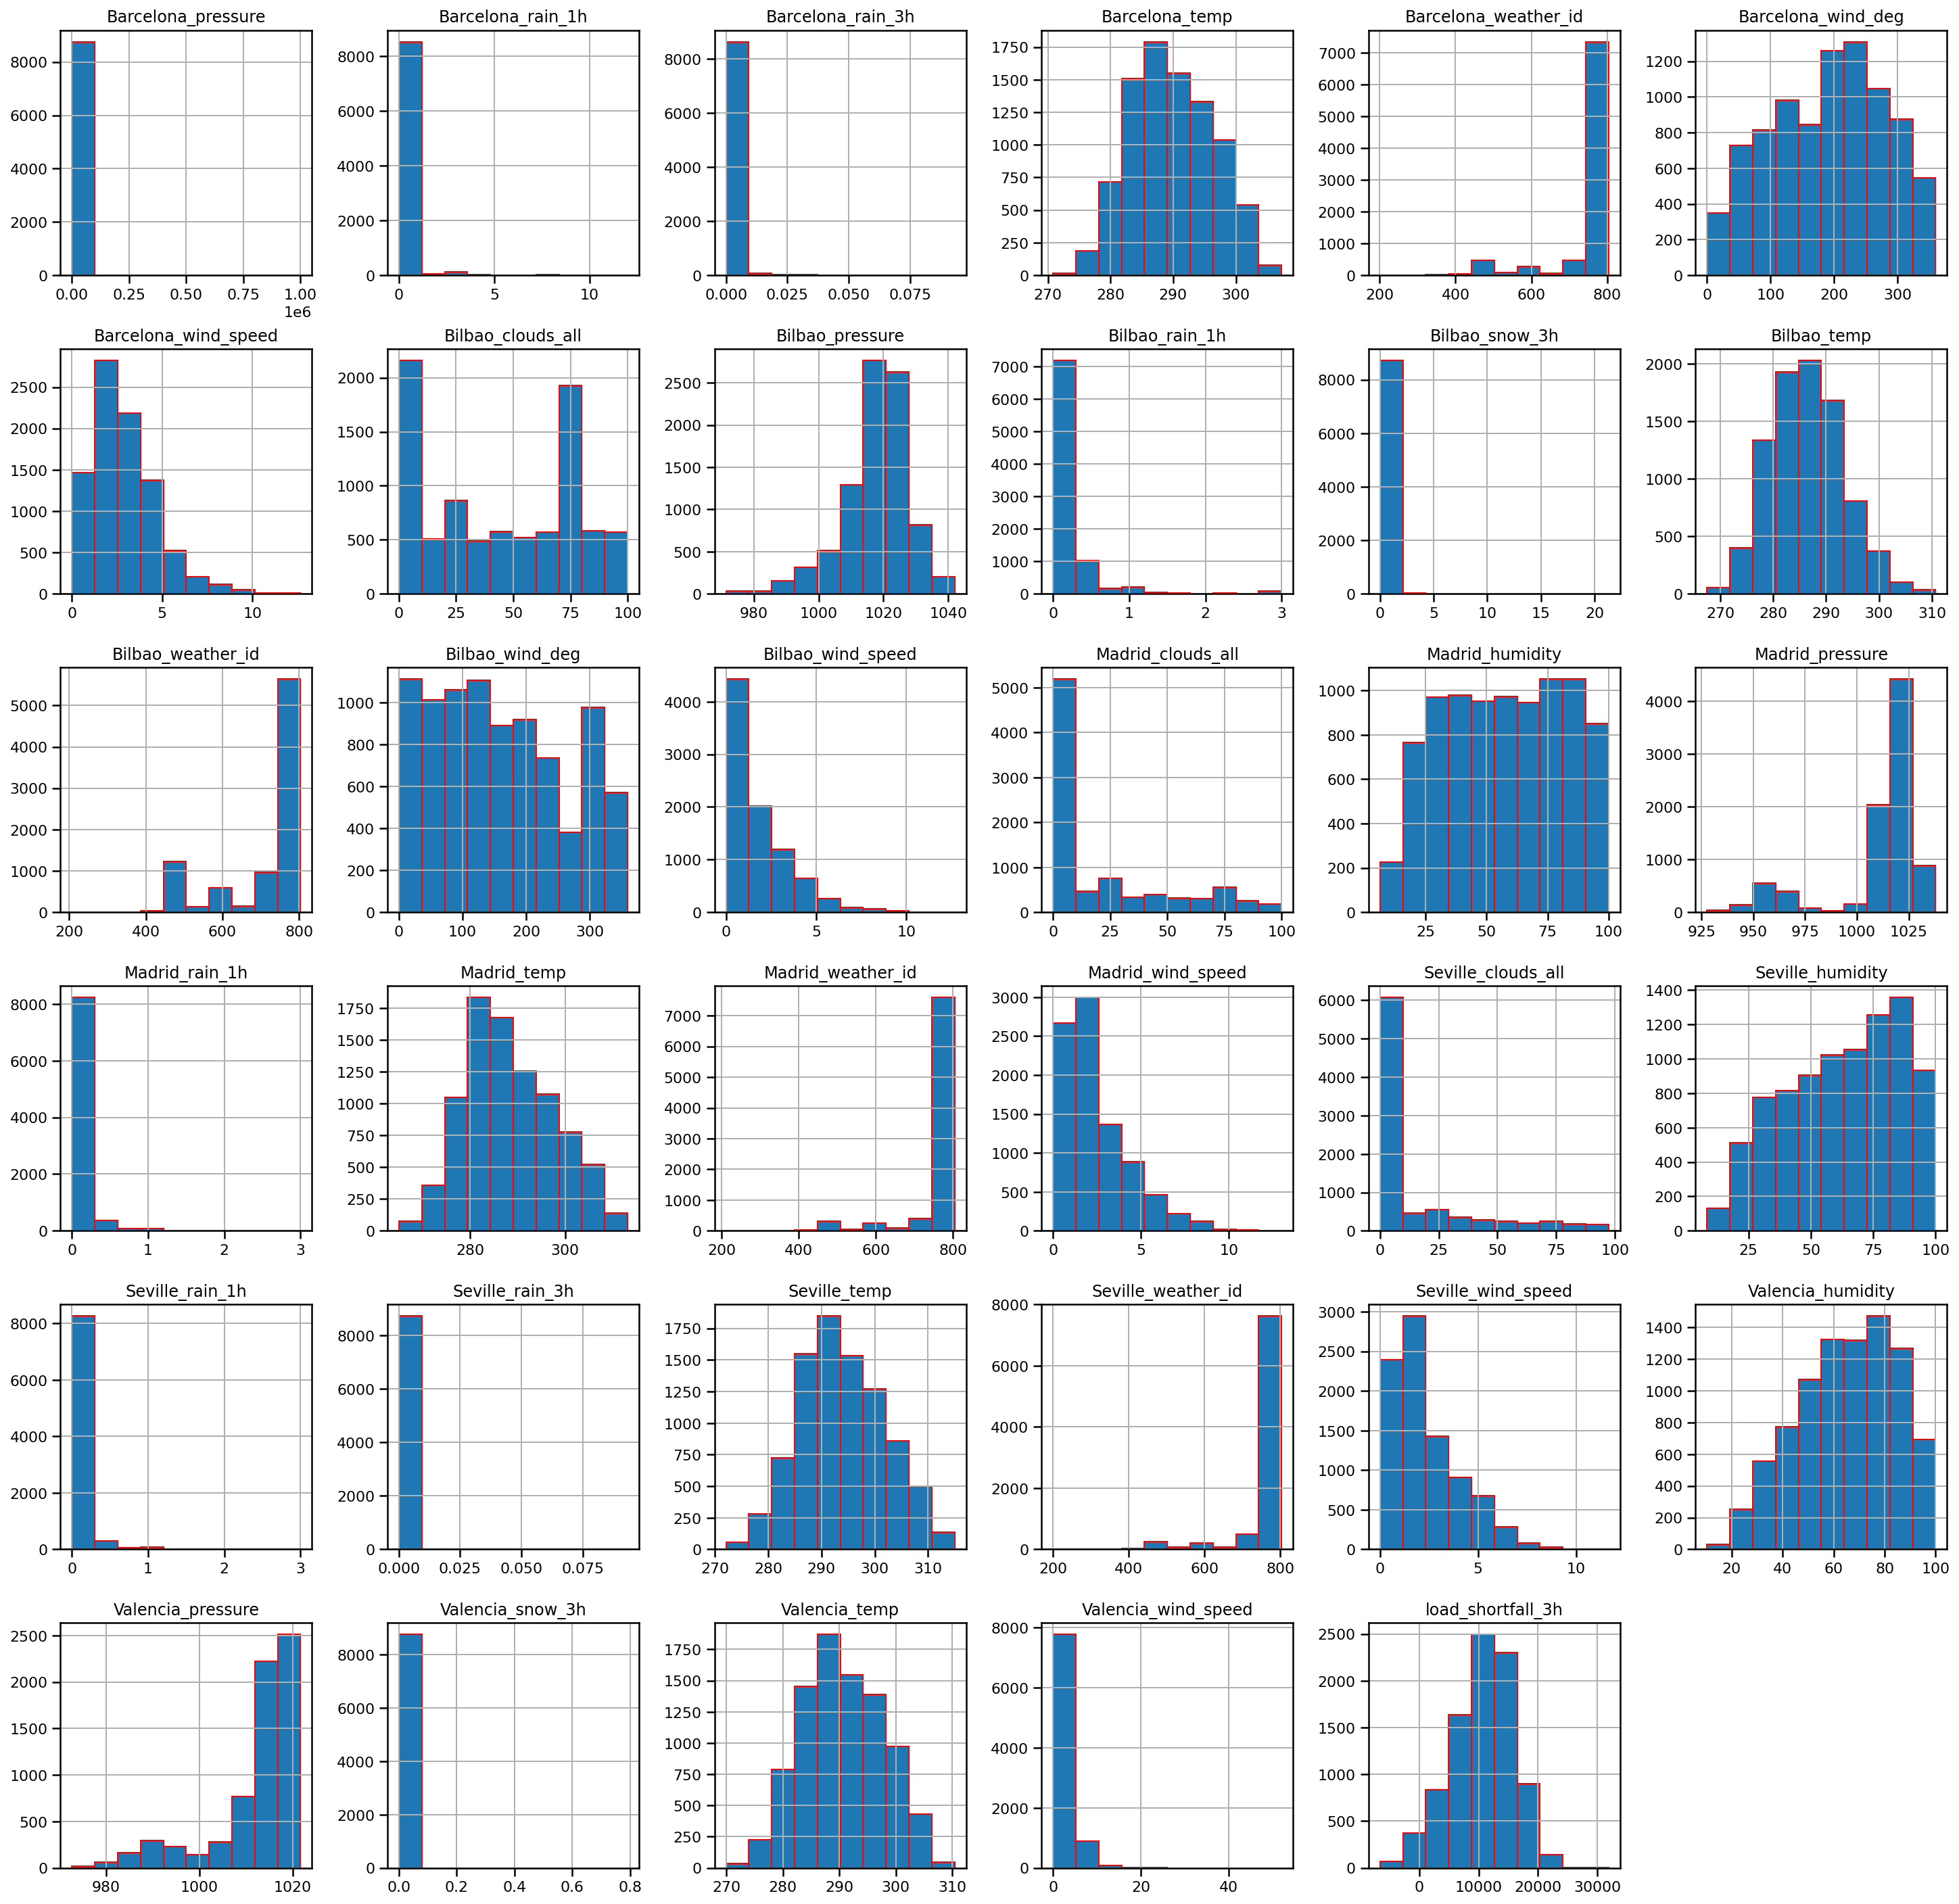

In [11]:
#visualizing the data distribution
features = ['Barcelona_pressure','Barcelona_rain_1h','Barcelona_rain_3h','Barcelona_temp','Barcelona_weather_id',
           'Barcelona_wind_deg','Barcelona_wind_speed','Bilbao_clouds_all','Bilbao_pressure','Bilbao_rain_1h',
           'Bilbao_snow_3h','Bilbao_temp','Bilbao_weather_id','Bilbao_wind_deg','Bilbao_wind_speed','Madrid_clouds_all',
           'Madrid_humidity','Madrid_pressure','Madrid_rain_1h','Madrid_temp','Madrid_weather_id','Madrid_wind_speed',
           'Seville_clouds_all','Seville_humidity','Seville_pressure','Seville_rain_1h','Seville_rain_3h',
            'Seville_temp','Seville_weather_id','Seville_wind_speed','Valencia_humidity','Valencia_pressure',
            'Valencia_snow_3h','Valencia_temp','Valencia_wind_deg','Valencia_wind_speed','load_shortfall_3h'] 

df[features].hist(ec="red", figsize=(25,25));

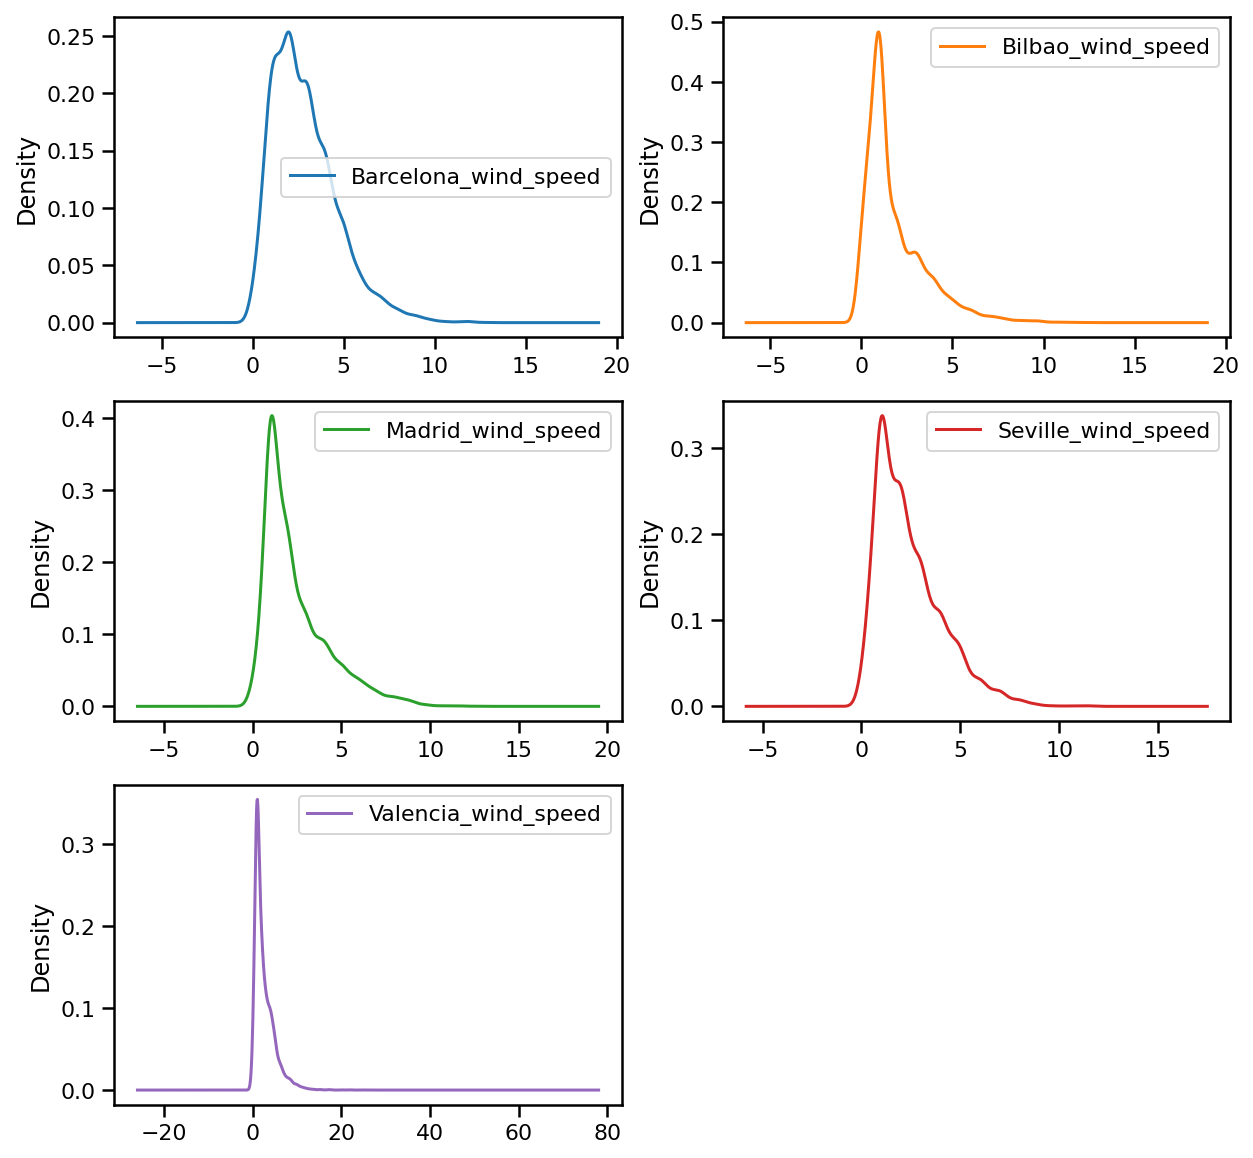

In [12]:
features2 = ['Barcelona_wind_speed', 'Bilbao_wind_speed', 'Madrid_wind_speed', 'Seville_wind_speed', 'Valencia_wind_speed']

df[features2].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

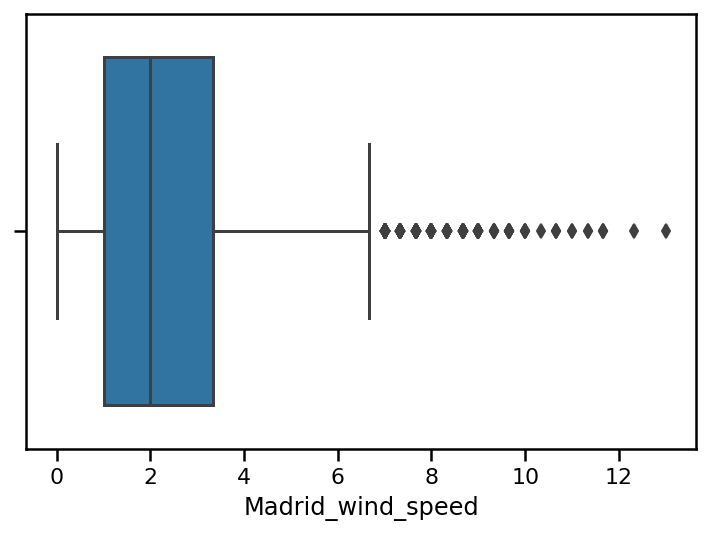

In [13]:
#visualising the data distribution showing the five number statistics and outliers present.
sns.boxplot(x='Madrid_wind_speed', data=df);

Explanation of the diagram;
- The minimum value is at 0,
- 25th percentile between 0 and 1,
- 50th(mean) at 2,
- 75th percentile between 4 and 6 and
- maximum value between 6 and 8. 
- It also shows that there are outliers after the maximum value(7)

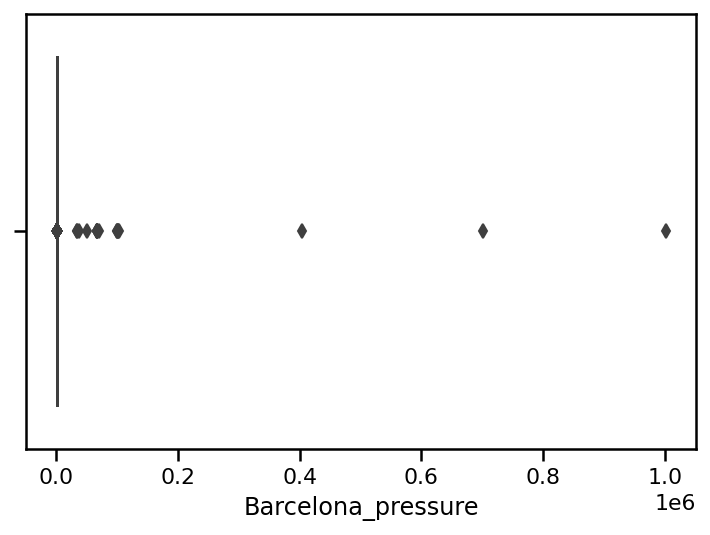

In [14]:
sns.boxplot(x='Barcelona_pressure', data=df);

This plot only shows the outliers present in 'Barcelona_pressure'

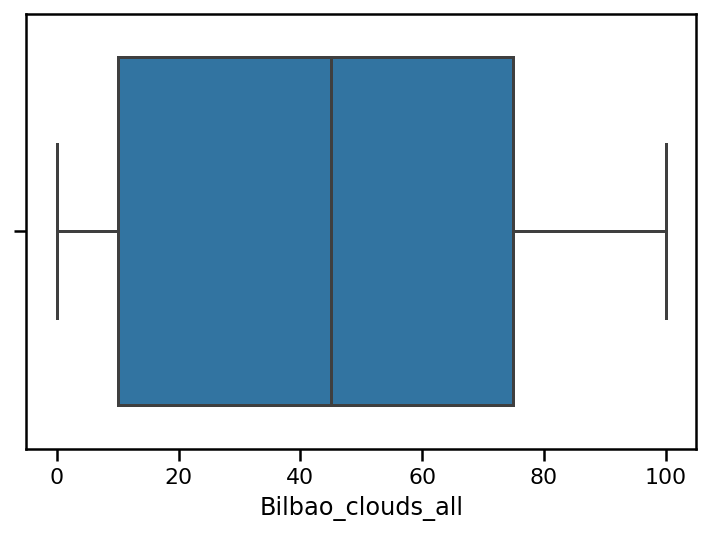

In [15]:
sns.boxplot(x='Bilbao_clouds_all', data=df);

Contrary to 'Madrid_wind_speed' and 'Barcelona_pressure', 'Bilbao_clouds_all' shows absense of outliers.

<Figure size 2160x1440 with 0 Axes>

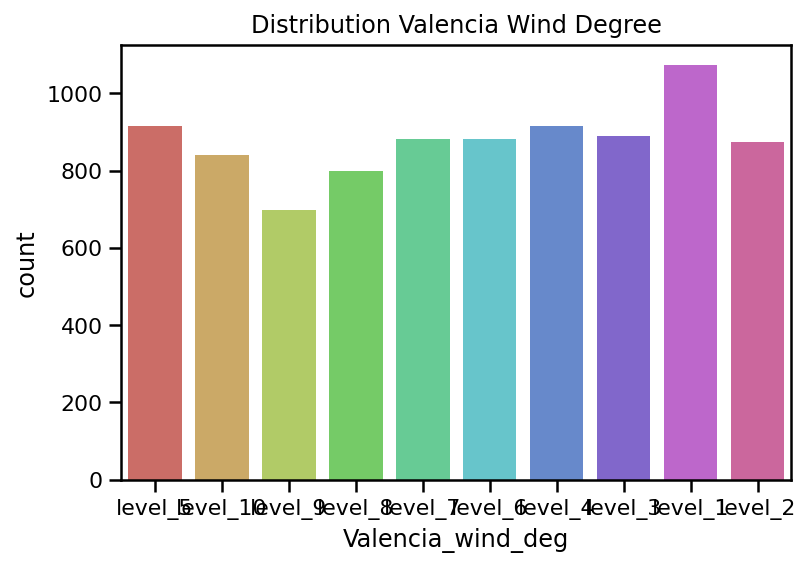

<Figure size 2160x1440 with 0 Axes>

In [16]:
# checking to see frequency of distribution of the categorical data.
sns.countplot(x = 'Valencia_wind_deg', data = df, palette="hls")
plt.title('Distribution Valencia Wind Degree')
plt.figure(figsize=(30,20))

The above graph shows that the mode of this distribution is at level_3.

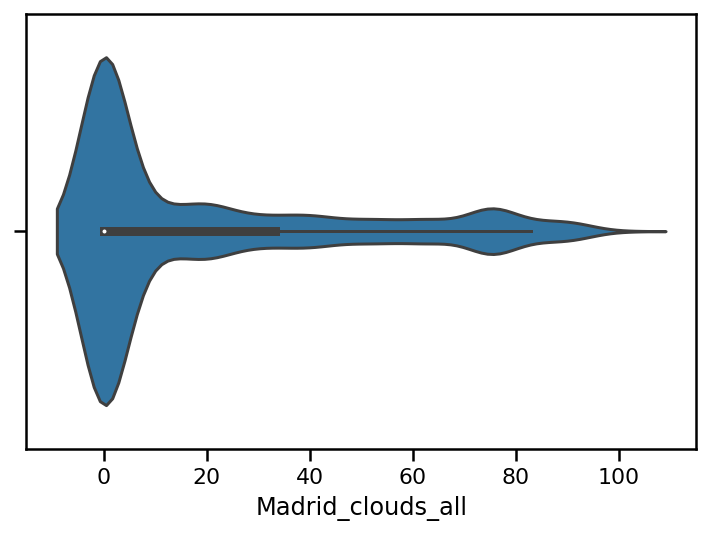

In [17]:
sns.violinplot(x='Madrid_clouds_all', data=df);

### Multivariate Analysis: Non-Graphical 

We will now be looking at the correlation between or data features.
Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.The value of the correlation coefficient varies between +1 and -1.

In [18]:
df.corr()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

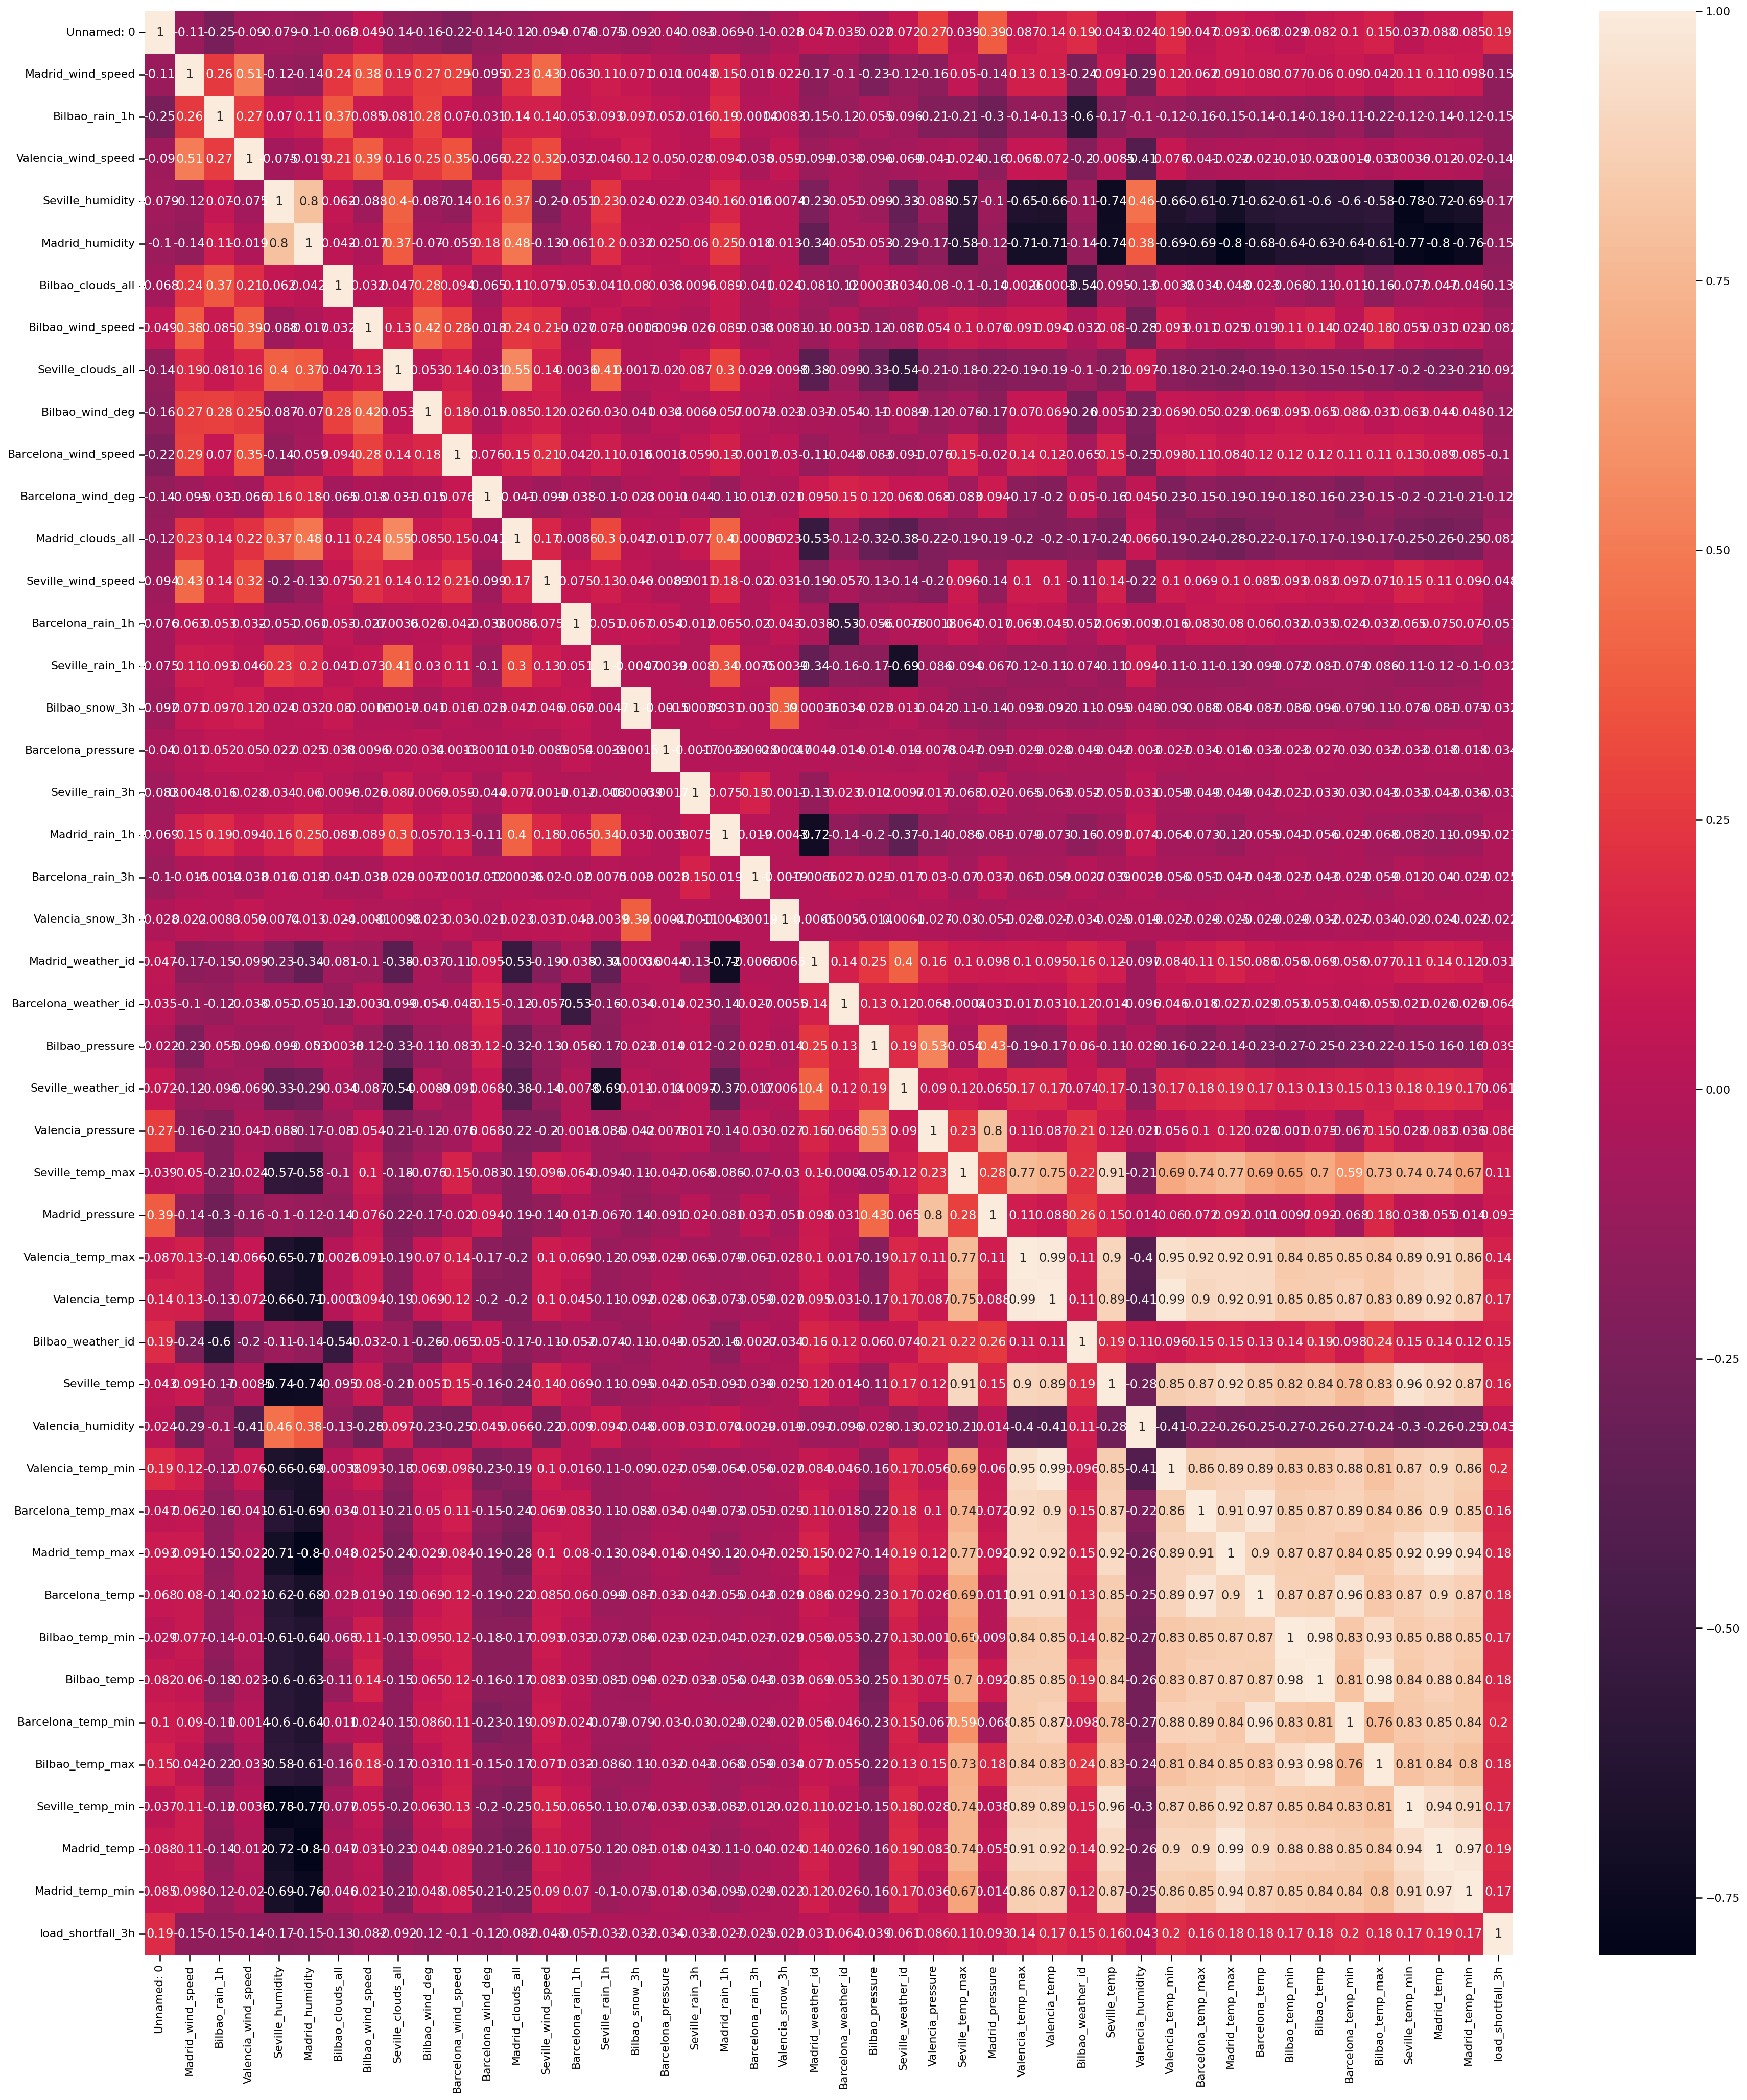

In [19]:
#The correlation coefficient value will be displayed on the heatmap using the seaborn library
plt.figure(figsize= (30,35))
sns.heatmap(df.corr(), annot=True);

It is deduced from the heatmap that some of the features are stronlgy correlated.
The stronger the correlation, the more difficult it is to change one variable without changing another

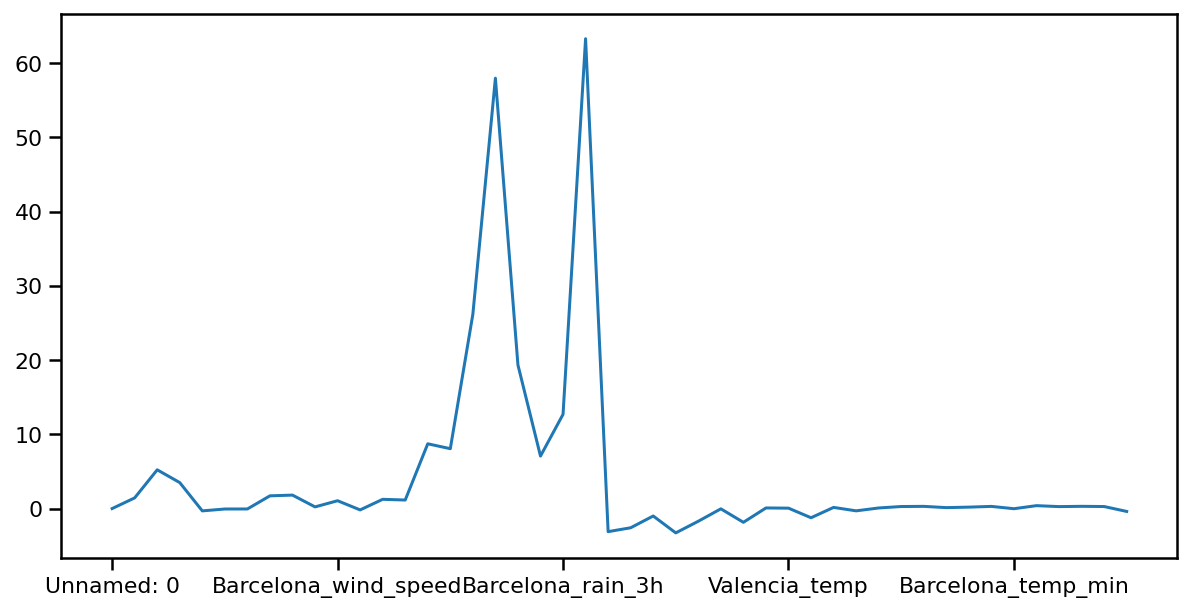

In [20]:
#Checking for outliers in the different features
plt.figure(figsize = [10,5])
df.skew(axis=0, skipna=True).plot();

From the plot above, it can be seen that 'Barcelona_win_speed' and 'Barcelona_rain_3h' has large outliers

# Relationship between Time and  Load_shortfall_3h

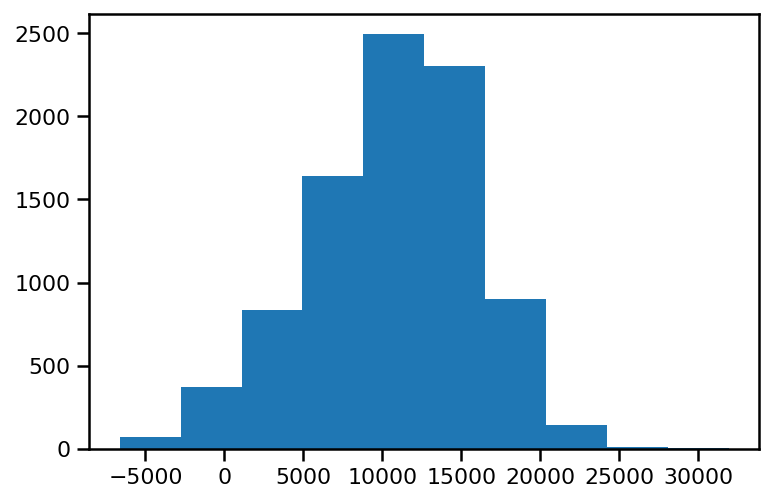

In [21]:
plt.hist(df['load_shortfall_3h']);

In [22]:
fig = px.line(df, y = df['load_shortfall_3h'], x =df['time'], width =900, height=400 )
fig.show()

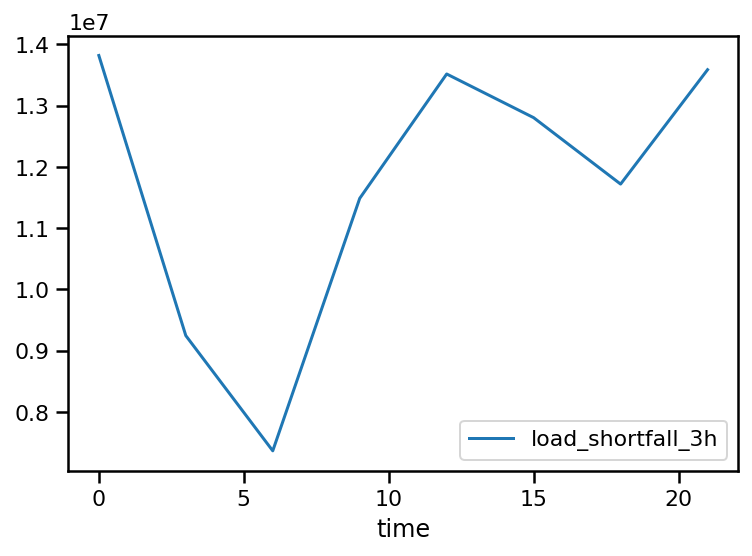

In [23]:
df.groupby([df['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].sum().plot(legend = True);

In [24]:
px.line(df.groupby([df['time'].astype('datetime64').dt.year])['load_shortfall_3h'].mean(),
        title = 'Yearly Load_shortfall_3h',
        y='load_shortfall_3h',width =800, height=400 )

The yearly Load_short_fall plots indicates an increase in load short fall from 2016 down to 2017.

In [25]:
# evaluate correlation
df.corr()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  \
Unnamed: 0              1.000000          -0.109288       -0.249633   
Madrid_wind_speed      -0.109288           1.000000        0.259719   
Bilbao_rain_1h         -0.249633           0.259719        1.000000   
Valencia_wind_speed    -0.090161           0.513092        0.265864   
Seville_humidity       -0.079025          -0.117892        0.069878   
Madrid_humidity        -0.103359          -0.137092        0.106765   
Bilbao_clouds_all      -0.068123           0.244001        0.370733   
Bilbao_wind_speed       0.049197           0.377854        0.085398   
Seville_clouds_all     -0.140583           0.191251        0.081131   
Bilbao_wind_deg        -0.155738           0.270950        0.279350   
Barcelona_wind_speed   -0.218781           0.294640        0.069997   
Barcelona_wind_deg     -0.140449          -0.095380       -0.030723   
Madrid_clouds_all      -0.116928           0.230126        0.135524   
Seville_wind_speed     -0.093926           0.434104        0.140101   
Barcelona_rain_1h      -0.075692           0.062758        0.052558   
Seville_rain_1h        -0.075340           0.108413        0.092984   
Bilbao_snow_3h         -0.092377           0.071183        0.096730   
Barcelona_pressure     -0.040157           0.011134        0.052458   
Seville_rain_3h        -0.082525           0.004795        0.016392   
Madrid_rain_1h         -0.068980           0.150446        0.187423   
Barcelona_rain_3h      -0.104326          -0.014644       -0.001412   
Valencia_snow_3h       -0.028130           0.021660        0.008269   
Madrid_weather_id       0.047202          -0.169358       -0.147768   
Barcelona_weather_id    0.034761          -0.099582       -0.120618   
Bilbao_pressure        -0.022475          -0.231747       -0.054814   
Seville_weather_id      0.072472          -0.120014       -0.095723   
Valencia_pressure       0.267772          -0.157088       -0.206765   
Seville_temp_max        0.039424           0.050043       -0.210323   
Madrid_pressure         0.385578          -0.136672       -0.298587   
Valencia_temp_max       0.087002           0.133468       -0.135198   
Valencia_temp           0.135294           0.128726       -0.127953   
Bilbao_weather_id       0.192485          -0.238128       -0.604616   
Seville_temp            0.042897           0.090861       -0.170009   
Valencia_humidity       0.023917          -0.285787       -0.103868   
Valencia_temp_min       0.185468           0.119657       -0.116835   
Barcelona_temp_max      0.047417           0.061854       -0.157326   
Madrid_temp_max         0.093378           0.091464       -0.148397   
Barcelona_temp          0.068078           0.080133       -0.138901   
Bilbao_temp_min         0.028698           0.077330       -0.141269   
Bilbao_temp             0.081799           0.060467       -0.182494   
Barcelona_temp_min      0.103436           0.089992       -0.106593   
Bilbao_temp_max         0.146216           0.042114       -0.219871   
Seville_temp_min        0.037487           0.110278       -0.120575   
Madrid_temp             0.088439           0.109572       -0.135927   
Madrid_temp_min         0.085197           0.098138       -0.116431   
load_shortfall_3h       0.192612          -0.150981       -0.152510   

                      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
Unnamed: 0                      -0.090161         -0.079025        -0.103359   
Madrid_wind_speed                0.513092         -0.117892        -0.137092   
Bilbao_rain_1h                   0.265864          0.069878         0.106765   
Valencia_wind_speed              1.000000         -0.075227        -0.019388   
Seville_humidity                -0.075227          1.000000         0.799831   
Madrid_humidity                 -0.019388          0.799831         1.000000   
Bilbao_clouds_all                0.210524          0.061680         0.041878   
Bilbao_wind_speed                0.386478   

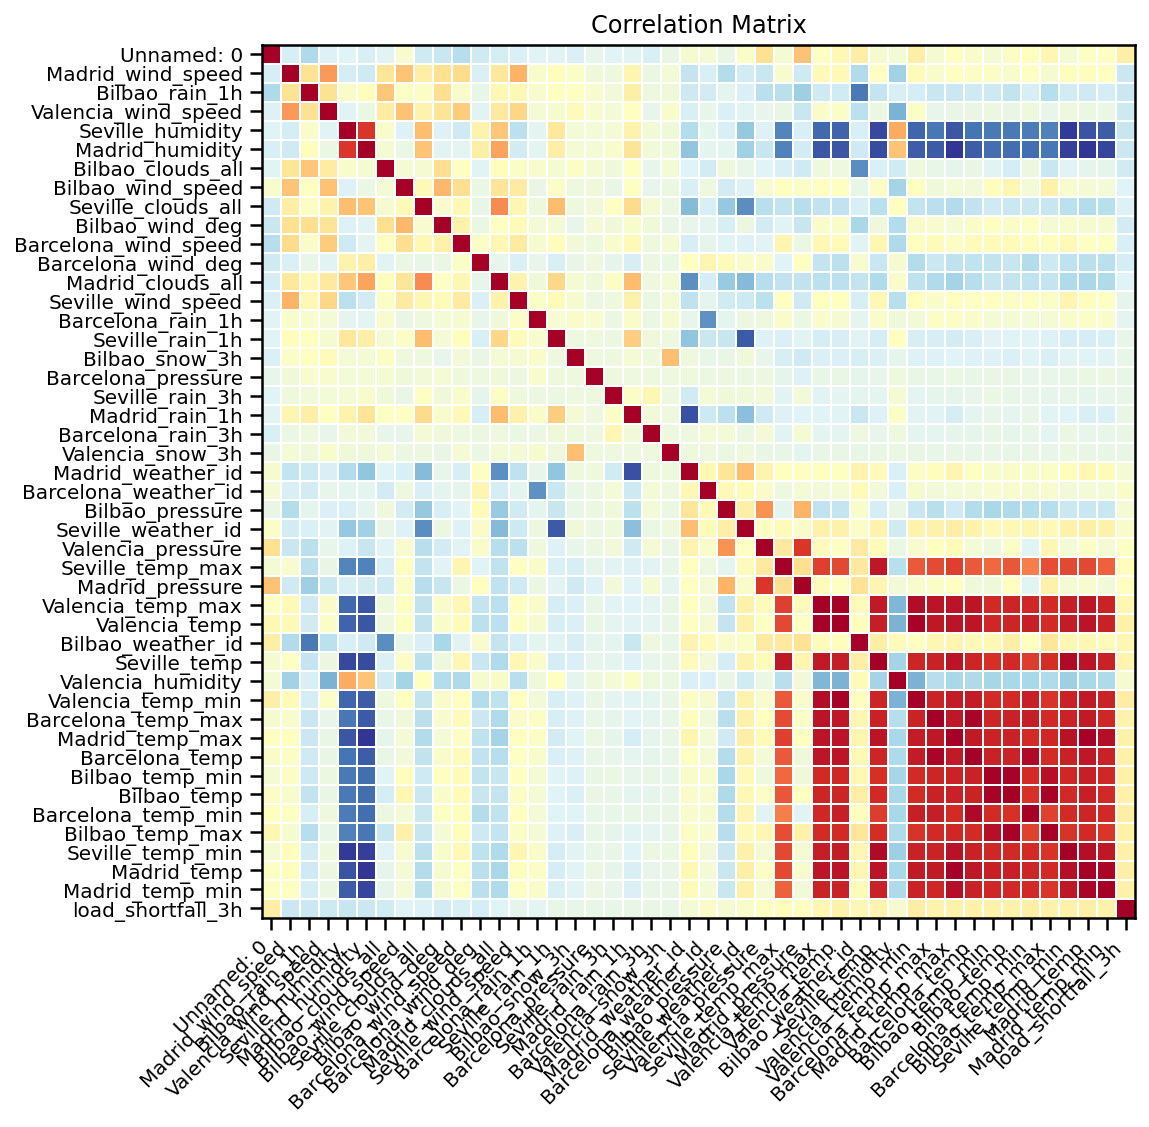

In [26]:
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax,);


In [27]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

Now we will be doing some feature engineering which includes;
- Data cleaning
- Creating new features and 
- Modifying existing features

A “feature” is any measurable input that can be used in a predictive model.
Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features.In simple terms, it is the act of converting raw observations into desired features using statistical or machine learning approaches.

## Importance of Feature Engineering


- For machine learning models, feature engineering is essential beacause it has a direct impact on the outcomes you can get with a predictive model. 
- Feature engineering allows for flexibility. You can select more ideal features thanks to feature engineering. 
- Better features offer greater flexibility and make it possible to utilize simpler, quicker, and easier to maintain models.


In [28]:
# remove missing values/ features

In [29]:
df.fillna(df.Valencia_pressure.mean(), inplace= True)
df_test.fillna(df_test.Valencia_pressure.mean(), inplace= True)

In [30]:
#removing the prefix 'sp' in the the 'df.Seville_pressure' observations
df.Seville_pressure = df.Seville_pressure.str[2:]
df_test.Seville_pressure = df_test.Seville_pressure.str[2:]

In [31]:
#converting the values to integer data type
df['Seville_pressure'] = df['Seville_pressure'].astype(int)
df_test['Seville_pressure'] = df_test['Seville_pressure'].astype(int)

In [32]:
# create new features

In [33]:
#sanity check
df.Seville_pressure.unique()

array([25, 23, 24, 21, 16,  9, 15, 19, 22, 11,  8,  4,  6, 13, 17, 20, 18,
       14, 12,  5, 10,  7,  3,  2,  1])

In [34]:
#removing the prefix 'level_' in the the 'df.Valencia_wind_deg' observations
df.Valencia_wind_deg = df.Valencia_wind_deg.str[6:]
df_test.Valencia_wind_deg = df.Valencia_wind_deg.str[6:]

In [35]:
#converting the values to integer data type
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(int)
df_test['Valencia_wind_deg'] = df['Valencia_wind_deg'].astype(int)

In [36]:
#sanity check
df.Valencia_wind_deg.unique()

array([ 5, 10,  9,  8,  7,  6,  4,  3,  1,  2])

In [37]:
# converting 'time' column to datetime data type
df["time"] = pd.to_datetime(df["time"])
df_test["time"] = pd.to_datetime(df_test["time"])

In [38]:
# Extract the date and time into individual components.
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month
df['Day'] = df['time'].dt.day
df['Hour'] = df['time'].dt.hour
df['Minutes'] = df['time'].dt.minute
df['Seconds'] = df['time'].dt.second

df_test['Year'] = df_test['time'].dt.year
df_test['Month'] = df_test['time'].dt.month
df_test['Day'] = df_test['time'].dt.day
df_test['Hour'] = df_test['time'].dt.hour
df_test['Minutes'] = df_test['time'].dt.minute
df_test['Seconds'] = df_test['time'].dt.second


In [39]:
#sanity check
df.head()

Unnamed: 0                time  Madrid_wind_speed  Valencia_wind_deg  \
0           0 2015-01-01 03:00:00           0.666667                  5   
1           1 2015-01-01 06:00:00           0.333333                 10   
2           2 2015-01-01 09:00:00           1.000000                  9   
3           3 2015-01-01 12:00:00           1.000000                  8   
4           4 2015-01-01 15:00:00           1.000000                  7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0                0.0           1.000000                 0.0       223.333333   
1                0.0           1.000000                 0.0       221.000000   
2                0.0           1.000000                 0.0       214.333333   
3                0.0           1.000000                 0.0       199.666667   
4                2.0           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0                25              0.0   
1            3.333333                0.0                25              0.0   
2            2.666667                0.0                25              0.0   
3            4.000000                0.0                25              0.0   
4            3.000000                0.0                25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4        1012.051407        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  

In [40]:
time = df_test['time']

In [41]:
df = df.drop(columns=['time','Minutes', 'Seconds'], axis = 1)
df_test = df_test.drop(columns=['time','Minutes', 'Seconds'], axis = 1)

In [42]:
df.head()

Unnamed: 0  Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
0           0           0.666667                  5             0.0   
1           1           0.333333                 10             0.0   
2           2           1.000000                  9             0.0   
3           3           1.000000                  8             0.0   
4           4           1.000000                  7             0.0   

   Valencia_wind_speed  Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
0             0.666667         74.333333        64.000000                0.0   
1             1.666667         78.333333        64.666667                0.0   
2             1.000000         71.333333        64.333333                0.0   
3             1.000000         65.333333        56.333333                0.0   
4             1.000000         59.000000        57.000000                2.0   

   Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  \
0           1.000000                 0.0       223.333333   
1           1.000000                 0.0       221.000000   
2           1.000000                 0.0       214.333333   
3           1.000000                 0.0       199.666667   
4           0.333333                 0.0       185.000000   

   Barcelona_wind_speed  Barcelona_wind_deg  Madrid_clouds_all  \
0              6.333333           42.666667                0.0   
1              4.000000          139.000000                0.0   
2              2.000000          326.000000                0.0   
3              2.333333          273.000000                0.0   
4              4.333333          260.000000                0.0   

   Seville_wind_speed  Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  \
0            3.333333                0.0                25              0.0   
1            3.333333                0.0                25              0.0   
2            2.666667                0.0                25              0.0   
3            4.000000                0.0                25              0.0   
4            3.000000                0.0                25              0.0   

   Bilbao_snow_3h  Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  \
0             0.0         1036.333333              0.0             0.0   
1             0.0         1037.333333              0.0             0.0   
2             0.0         1038.000000              0.0             0.0   
3             0.0         1037.000000              0.0             0.0   
4             0.0         1035.000000              0.0             0.0   

   Barcelona_rain_3h  Valencia_snow_3h  Madrid_weather_id  \
0                0.0               0.0              800.0   
1                0.0               0.0              800.0   
2                0.0               0.0              800.0   
3                0.0               0.0              800.0   
4                0.0               0.0              800.0   

   Barcelona_weather_id  Bilbao_pressure  Seville_weather_id  \
0                 800.0      1035.000000               800.0   
1                 800.0      1035.666667               800.0   
2                 800.0      1036.000000               800.0   
3                 800.0      1036.000000               800.0   
4                 800.0      1035.333333               800.0   

   Valencia_pressure  Seville_temp_max  Madrid_pressure  Valencia_temp_max  \
0        1002.666667        274.254667       971.333333         269.888000   
1        1004.333333        274.945000       972.666667         271.728333   
2        1005.333333        278.792000       974.000000         278.008667   
3        1009.000000        285.394000       994.666667         284.899552   
4        1012.051407        285.513719      1035.333333         283.015115   

   Valencia_temp  Bilbao_weather_id  Seville_temp  Valencia_humidity  \
0     269.888000              800.0    274.254667          75.666667   
1     271.728333              800.0    274.945

'Unnamed: 0' column is a redundant index column in this data, so we'll have to drop the column.

In [43]:
df = df.drop(columns = 'Unnamed: 0')
df_test  = df_test.drop(columns = 'Unnamed: 0')

In [44]:
# splitting the features into predictors and response variable.
X = df.drop(columns = 'load_shortfall_3h')
y = df['load_shortfall_3h'].astype('int')

Using SelectKBest, we will check the ten least important features in our data.


In [45]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10)

Features        Score
37     Madrid_temp_max  2281.817118
44         Madrid_temp  2106.588763
45     Madrid_temp_min  2054.920443
28    Seville_temp_max  1847.097423
43    Seville_temp_min  1589.866015
33        Seville_temp  1483.057026
30   Valencia_temp_max  1365.685590
36  Barcelona_temp_max  1260.724182
31       Valencia_temp  1229.799250
42     Bilbao_temp_max  1223.770161

From the above, we are able to see the last ten features according to their level of importance according to their score,we will then be using all features in the data leaving behind the least important ones.

In [46]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month', 'Day','Hour']]

In [47]:
df_test = df_test[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month', 'Day','Hour']]

## Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data.It is important to rescale with regularisation because the size of the variables affects how much regularisation will be applied to that specific variable.There are two common scaling techniques; Normalisation and Standardisation.
But in this project we will be using the Standardisation technique beacuse of its ability to handle outliers satisfactorily.

In [48]:
# Create standardization object
scaler = StandardScaler()

In [49]:
# create scaled version of the predictors 
X_scaled = scaler.fit_transform(X)
df_test = scaler.fit_transform(df_test)

In [50]:
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.565065         0.630823              1.932284   
1           -0.565065         0.607959              0.630270   
2           -0.565065         0.542632             -0.485743   
3           -0.565065         0.398912             -0.299741   
4           -0.565065         0.255192              0.816272   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -1.660205          -0.694188            0.542975   
1           -0.578686          -0.694188            0.542975   
2            1.520733          -0.694188            0.144442   
3            0.925711          -0.694188            0.941509   
4            0.779762          -0.694188            0.343708   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  \
0          -0.203099          1.588087        -0.224278       -0.057269   
1          -0.203099          1.588087        -0.224278       -0.057269   
2          -0.203099          1.588087        -0.224278       -0.057269   
3          -0.203099          1.588087        -0.224278       -0.057269   
4          -0.203099          1.588087        -0.224278       -0.057269   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0           -0.024277        -0.066278       -0.247776          -0.110037   
1           -0.024206        -0.066278       -0.247776          -0.110037   
2           -0.024158        -0.066278       -0.247776          -0.110037   
3           -0.024229        -0.066278       -0.247776          -0.110037   
4           -0.024372        -0.066278       -0.247776          -0.110037   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0         -0.017312           0.342424              0.385993         1.718219   
1         -0.017312           0.342424              0.385993         1.784583   
2         -0.017312           0.342424              0.385993         1.817765   
3         -0.017312           0.342424              0.385993         1.817765   
4         -0.017312           0.342424              0.385993         1.751401   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Bilbao_weather_id  \
0            0.352274      -1.129531e+00         -2.616796           0.649842   
1            0.352274      -9.289340e-01         -2.539014           0.649842   
2            0.352274      -8.085757e-01         -2.105564           0.649842   
3            0.352274      -3.672620e-01         -1.361703           0.649842   
4            0.352274       2.736630e-13         -1.348214           0.649842   

   Valencia_humidity      Year     Month       Day      Hour  
0           0.540928 -1.226179 -1.602429 -1.675368 -1.090901  
1           0.298645 -1.226179 -1.602429 -1.675368 -0.654451  
2           0.021750 -1.226179 -1.602429 -1.675368 -0.218001  
3          -0.583957 -1.226179 -1.602429 -1.675368  0.218449  
4          -0.358980 -1.226179 -1.602429 -1.675368  0.654899

In [51]:
df_test = pd.DataFrame(df_test,columns=X.columns)
df_test.head()


Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           1.432590          -0.126689       -0.440268             0.995600   
1           1.244747           1.551767       -0.440268             1.162600   
2          -0.070152           1.216076       -0.440268             0.995600   
3           0.117691           0.880385       -0.440268             1.162600   
4           0.869062           0.544694       -0.440268             2.832609   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.964514         0.360022          -0.766227           0.433023   
1          1.061565         0.636255          -1.422372           0.835964   
2          1.061565         1.119662          -1.422372           0.030083   
3          1.271842         0.829617          -0.547512           2.044786   
4         -0.086869         0.056166          -0.547512           5.066840   

   Seville_clouds_all  Bilbao_wind_deg  Barcelona_wind_speed  \
0           -0.612116         0.314013              0.911814   
1           -0.612116        -0.197584              1.322013   
2           -0.348454        -0.334010              0.911814   
3           -0.348454         0.348120             -0.113683   
4           -0.612116         0.723291              1.322013   

   Barcelona_wind_deg  Madrid_clouds_all  Seville_wind_speed  \
0           -0.026595          -0.824321           -0.926549   
1            1.008344          -0.824321           -1.112918   
2            0.970013          -0.824321           -1.112918   
3           -1.061535          -0.824321           -0.740180   
4            1.199999          -0.824321           -0.926549   

   Barcelona_rain_1h  Seville_pressure  Seville_rain_1h  Bilbao_snow_3h  \
0          -0.291772          2.079927          -0.2387             0.0   
1          -0.291772          2.079927          -0.2387             0.0   
2          -0.291772          2.079927          -0.2387             0.0   
3          -0.291772          2.079927          -0.2387             0.0   
4          -0.291772          2.079927          -0.2387             0.0   

   Barcelona_pressure  Seville_rain_3h  Madrid_rain_1h  Barcelona_rain_3h  \
0            0.287199        -0.018509       -0.309874          -0.025749   
1            0.714535        -0.018509       -0.309874          -0.025749   
2            1.094389        -0.018509       -0.309874          -0.025749   
3            1.474243        -0.018509       -0.309874          -0.025749   
4            1.521725        -0.018509       -0.309874          -0.025749   

   Valencia_snow_3h  Madrid_weather_id  Barcelona_weather_id  Bilbao_pressure  \
0               0.0           0.440333              0.403362         1.021118   
1               0.0           0.440333              0.406764         1.135113   
2               0.0           0.440333              0.403362         0.983120   
3               0.0           0.440333              0.403362         0.945121   
4               0.0           0.440333              0.406764         0.641133   

   Seville_weather_id  Valencia_pressure  Seville_temp_max  Bilbao_weather_id  \
0            0.366821       3.790327e-14         -0.944893           0.602769   
1            0.366821       3.790327e-14         -1.210834          -0.151153   
2            0.371224       3.790327e-14         -1.432451           0.593345   
3            0.371224       3.790327e-14         -1.388128           0.605911   
4            0.366821       3.790327e-14         -0.590304           0.605911   

   Valencia_humidity  Year     Month       Day      Hour  
0          -0.996620   0.0 -1.602745 -1.673503 -1.527525  
1          -0.597040   0.0 -1.602745 -1.673503 -1.091089  
2          -1.232735   0.0 -1.602745 -1.673503 -0.654654  
3          -1.069270   0.0 -1.602745 -1.673503 -0.218218  
4          -1.287223   0.0 -1.602745 -1.673503  0.218218

Taking a look at 'Barcelona_pressure', we can see that standardizing the data has caused it to be centered around zero.

In [52]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

## Fitting the Multivariate Regression Model

The model that will be used are;
- Linear Regression to integrate the use of a single predictor variable when fitting a model.
- Ridge 

In [53]:
'''#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)'''

We will be trying the following models on our data set in order to identify the best model for our prediction.

Linear Regression Model

A multiple linear regression model is a linear equation that has the general form: y = b1x1 + b2x2 + … + c where y is the dependent variable, x1, x2… are the independent variable, and c is the (estimated) intercept.

In [ ]:
#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [55]:
# creating model object
lm = LinearRegression()

In [56]:
# training the model
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
#predicting on test and training set.
predict = lm.predict(X_test)
train_predict = lm.predict(X_train)

# Regularization
Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting. There are three main regularization techniques, namely:
- Lasso (L1 Norm).
- Ridge Regression (L2 Norm).
- Dropout.
But only we will only be looking at the Lasso and Ridge Regression techniques in this notebook.

## Lasso Regression

Lasso regression is a regularization technique which is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean.
All coefficients are set to zero if the value of alpha is very large but Lasso regression produces the same coefficients as a linear regression if alpha is zero.
Therefore, we'll be making our alpha as close to zero as possible by using 0.01.


A LASSO model is fit under the constraint of minimizing the equation below:

$ min𝛽(𝑅𝑆𝑆+𝛼(𝐿1_𝑛𝑜𝑟𝑚)). $
- where RSS is the Residual Sum of Squares
- 𝐿2_𝑛𝑜𝑟𝑚  is the sum of the squares of the coefficients.
- 𝛼 is the coefficient

In [58]:
# creating lasso model object
lasso = Lasso(alpha=0.01)

In [59]:
#Training the LASSO model
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

In [60]:
# Getting predictions
lasso_pred = lasso.predict(X_test)

## Ridge Regression
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.
In the case of ridge regression, the regression coefficients are calculated as the values that minimise:

min𝛽(𝑅𝑆𝑆+𝛼∑𝑗=1𝑝𝑏2𝑗)

In [61]:
# Creating Ridge model object
Ridge = Ridge()

In [62]:
# Training the model
Ridge.fit(X_train, y_train)

Ridge()

In [63]:
# Getting predictions
Ridge_pred = Ridge.predict(X_test)

In [64]:
# Our forest consists of 200 trees with a max depth of 8 
RF = RandomForestRegressor(n_estimators=600, max_depth=100, random_state= 23)


In [65]:
# Fitting the model
RF.fit(X_train,y_train)


RandomForestRegressor(max_depth=100, n_estimators=600, random_state=23)

In [66]:
# Getting predictions
RF_predict = RF.predict(X_test)

In [67]:
df_test['load_shortfall_3h'] = RF.predict(df_test)

In [68]:
df_test['time'] = time
load = df_test[['time','load_shortfall_3h']]
load.to_csv('submission.csv', index = False)
load

time  load_shortfall_3h
0    2018-01-01 00:00:00        7845.881667
1    2018-01-01 03:00:00        2377.533333
2    2018-01-01 06:00:00        2714.255000
3    2018-01-01 09:00:00        5929.006667
4    2018-01-01 12:00:00        6145.316667
...                  ...                ...
2915 2018-12-31 09:00:00       12016.123333
2916 2018-12-31 12:00:00       14019.631667
2917 2018-12-31 15:00:00       13833.406667
2918 2018-12-31 18:00:00       14236.131667
2919 2018-12-31 21:00:00       12809.230000

[2920 rows x 2 columns]

In [69]:
# Creating Decision tree model object
Reg_tree = DecisionTreeRegressor(random_state=42)


In [70]:
# Fitting the model
Reg_tree.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

In [71]:
# Getting predictions
Tree_pred = Reg_tree.predict(X_test)

In [72]:
# Instantiate support vector regression model
Sv_reg = SVR(kernel='rbf', gamma='auto')


In [73]:
# Train the model
Sv_reg.fit(X_train,y_train)


SVR(gamma='auto')

In [74]:
# Getting predictions
SV_pred = Sv_reg.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [75]:
# Compare model performance
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

In [76]:
print(Linear.head()) #Linear Model 
print('\n')
print(Lass_.head()) # Lasso Model
print('\n')
print(Ridge_.head()) # Ridge Model
print('\n')
print(Sv_.head()) #SVR Model
print('\n')
print(Des_.head()) #Decision Tree Model
print('\n')
print(Rand_.head()) # Random Forest Model

      Actual     Predicted
1226   11450  11993.482165
7903   13693  12555.605866
1559   18337  11573.321016
3621   -1221   8663.865490
7552    8515  13743.078403


      Actual     Predicted
1226   11450  11993.447039
7903   13693  12555.593821
1559   18337  11573.324694
3621   -1221   8663.895120
7552    8515  13742.993795


      Actual     Predicted
1226   11450  11993.152156
7903   13693  12555.252943
1559   18337  11573.441242
3621   -1221   8663.989915
7552    8515  13742.560459


      Actual     Predicted
1226   11450  11112.691831
7903   13693  11111.504658
1559   18337  11203.829633
3621   -1221  11001.643798
7552    8515  11214.051708


      Actual  Predicted
1226   11450     8593.0
7903   13693    11816.0
1559   18337    19947.0
3621   -1221     2623.0
7552    8515    10368.0


      Actual     Predicted
1226   11450   8143.395000
7903   13693  13530.455000
1559   18337  15122.125000
3621   -1221   3290.171667
7552    8515  10242.771667


In [77]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

Test RMSE
Decision Tree  4519.834385
Lasso          4910.101136
Linear model   4910.099701
Random Forest  3150.078766
Ridge          4910.099416
SVR            5296.239502

In [97]:
fig = px.bar(Model_Performance, y=Model_Performance['Test RMSE'],color= Model_Performance.index,
                 title="Test Root Mean Squared error",width =700, height=400,
                 color_continuous_scale=["orange", "red","green", "blue", "purple"])
fig.show()



In [79]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

Test MSE
Decision Tree  2.042890e+07
Lasso          2.410909e+07
Linear model   2.410908e+07
Random Forest  9.922996e+06
Ridge          2.410908e+07
SVR            2.805015e+07

In [100]:
px.bar(Model_Performance2, y =Model_Performance2['Test MSE'], title="Test Mean Squared error",
       color = Model_Performance2.index, width =700, height=400, 
       color_continuous_scale=["orange", "red","green", "blue", "purple"])

In [80]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

Test MAE
Decision Tree  3363.021677
Lasso          3925.809323
Linear model   3925.805424
Random Forest  2480.638670
Ridge          3925.814074
SVR            4228.475123

In [102]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'], title="Test Mean Absolute error",
       color = Model_Performance3.index, width =700, height=400,
       color_continuous_scale=["orange", "red","green", "blue", "purple"])

In [81]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                         "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

Test R^2
Decision Tree  0.274598
Lasso          0.143920
Linear model   0.143921
Random Forest  0.647648
Ridge          0.143921
SVR            0.003979

In [104]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],title="Test R-Squared",
       color = Model_Performance4.index, width =700, height=400,
       color_continuous_scale=["orange", "red","green", "blue", "purple"])

In [82]:
import pickle

model_save_path = "new2.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(Ridge,file)

In [83]:
# Choose best model and motivate why it is the best choice

The best model is the Random Forest model(RFM).

This model was choosen after carrying out series of model performance metrices;
- Root Mean Squared Error(RMSE);
RMSE can be interpreted as the standard deviation of the unexplained variance which is a good measure of how accurately the model predicts the response variable.Lower values of RMSE indicate better fit.
The RMSE of Random Forest model is **3150.07** which is the least value comparing the model performaces.
- Mean Squared Error(MSE);
Mean squared error measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. As model error increases, its value increases. Also here, the mse for the RFM is approximately **9.9e+06** also indicating the least value.
- Mean Absolute Error(MAE);
MAE is simply the mean of the absolute errors. The absolute error is the absolute value of the difference between the forecasted value and the actual value. MAE tells us how big of an error we can expect from the forecast on average. The mae for RFM is **2480** which is the least value in the model performance.
- R-Squared;
R-squared is a goodness-of-fit measure for linear regression models. It indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. From the R-squared model performace,
random forest model was seen to have the highest percentage of **64.8%**. 
Putting together the results of the model performance metrices, we have come into conclusion that the Random Forest model performed better with the test data compared to other models,

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [109]:
# discuss chosen methods logic
X_train

array([[ 0.31037205,  1.64158011,  0.4381341 , ..., -1.60242883,
         0.02953373,  0.21844914],
       [-0.95070841, -1.48615884, -0.36212348, ...,  1.00794739,
         1.7344352 , -0.21800088],
       [-0.23009101,  1.29405356,  0.17138157, ..., -1.60242883,
        -0.31144657,  1.5277992 ],
       ...,
       [ 0.67068075,  0.94652701,  2.03864927, ...,  1.29798919,
        -1.22072735, -0.21800088],
       [-0.59039971,  1.29405356, -0.36212348, ..., -0.73230342,
         0.37051402, -1.09090093],
       [ 1.39129816,  0.94652701, -0.36212348, ..., -0.15221982,
         1.3934549 , -0.21800088]])

In [110]:
y_train

5967    12559
8270    15848
100     16585
3410    12462
1790     8987
        ...  
5734     5298
5191    16268
5390     7338
860      6255
7270     9574
Name: load_shortfall_3h, Length: 7010, dtype: int32

# Random Forest Model


Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.